## property 實作封裝

In [8]:
class Employee:
    def __init__(self,name,salary=20000):
        self.name = name
        if salary >= 20000:
            self.__salary = salary
        else:
            self.__salary = 20000
    def get_salary(self):            
            return self.__salary
    def set_salary(self,v):
        if v > 20000:
            self.__salary = v
        else:  
            print("薪水不可低於最低工資")
    def del_salary(self):
        del self.__salary
    salary = property(get_salary,set_salary,del_salary)       
emp1 = Employee("Sean",50000)    
emp2 = Employee("David")    

print(emp1.salary)
print(emp2.salary)
emp1.salary += 6000
emp2.salary += 500
print(emp1.salary)
print(emp2.salary)

50000
20000
56000
20500


## property 裝飾器

In [15]:
class Employee:
    def __init__(self,name,salary=20000):
        self.__name = name
        if salary >= 20000:
            self.__salary = salary
        else:
            self.__salary = 20000
    @property        
    def salary(self):
        return self.__salary
    @salary.setter
    def salary(self,v):
        if v >= 20000:
            self.__salary = v
        else:
            print("薪水不可低於最低工資")
    @salary.deleter        
    def salary(self):        
        del self.__salary
emp1 = Employee("Sean",50000)
emp2 = Employee("David")
print(emp1.salary)
emp1.salary = 10000
print(emp1.salary)

50000
薪水不可低於最低工資
50000


## 請問執行後的結果是哪一個？

In [16]:
class pri:
    __count = 0
    def count(self):
        self.__count += 1
        print(self.__count)
priObj =  pri()
priObj.count()
priObj.count()

1
2


## 類別的繼承
+ 繼承語法  
class 子類別(父類別)：
  + 父類別類名寫在括號裡
  + 子類別繼承父類別的成員
    + 子類別找不到定義的成員，會自動尋找父類別內的定義。
    + 類別屬性、類別及實體方法、函數會被繼承下來
    + 實體屬性在__init__()中加入，不一定會被新增
  + 父類別的__init__( )初始化方法不會被自動使用
  + 需要在子類別的初始化方法中指定使用才會執行
     + super(子類別, self).__init__(…) 
     + 不呼叫父類別初始化方法時，不會新增父類別實體屬性   

In [32]:
class Animal:
    __count = 0
    def __init__(self,name,age):
        print("Animal")
        Animal.__count  += 1
        self.__name = name
        self.__age = age
    def getName(self):    
        return self.__name
    def getAge(self):
        return self.__age
    def getCount():
        return Animal.__count
class Cat(Animal):
    pass

class Dog(Animal):
    def __init__(self,name,age,weight):
        super(Dog,self).__init__(name,age)
        self.__weight = weight
    def getWeight(self):    
        return self.__weight
    
am1 = Cat("kitty",12)  
dog1 = Dog("BoBo",5,25)

print(am1.getName())
print(am1.getAge())

print(dog1.getName())
print(dog1.getWeight())
print(Dog.getCount())

Animal
Animal
kitty
12
BoBo
25
2


## 方法覆寫

In [28]:
class Parent:
    def myMethod(self):
        print("A")
class Child(Parent):
    def myMethod(self):
        print("B")
c = Child()
c.myMethod()

B


In [33]:
class Parent:
    def myMethod(self):
        print('A')
class Child(Parent):        
    def myMethod(self):
        print('B')
        super().myMethod()
        #super(Child,self).myMethod()
c = Child()
c.myMethod()

B
A


In [40]:
class Person:
    def __init__(self,name,age):
        self.__name = name
        self.__age = age
    def getName(self):
        return self.__name
    def getAge(self):
        return self.__age
class Dog(Person):
    def getName(self):
        return "Dog "+super().getName()
p1 = Dog("BoBo",2)    
print(p1.getName())
print(p1.getAge())
# 希望Dog有 getName    
# 希望Dog有 getAge
# getName 可回傳　Dog BoBo 


Dog 
2


## 多重繼承
+ 繼承多個父類別時用，隔開
+ 注意成員搜尋的順序
  + 從子類別開始
  + 同一階層父類別由左至右搜尋
  + 更上層祖父類別由左至右搜尋
  + 直到達到頂層為止

In [45]:
class S():
    def method1(self):
        print('S.method1')
    def method2(self):
        print("S.method2")
class A(S):
    def method3(self):
        print("A.method3")
class B(S):
    def method2(self):
        print("B.method2")
    def method3(self):
        print("B.method3")
class C(A,B):
    value = 0
    def method4(self):
        print("C.method4")
c = C()
c.method4()
c.method3()
c.method2()
c.method1()

C.method4
A.method3
B.method2
S.method1


## Python類別內建屬性
+ __class__：物件所屬類別
+ __module__：類別/物件所屬模組字串
+ 若沒有引用其他模組則預設為  ′__main__′ 
+ __name__：類別名稱字串
+ __bases__：類別所有父類別，傳回 tuple
+ __dict__：類別/物件所屬名稱空間字典(鍵值對)
+ __doc__：類別說明字串
  + 模組、 類別、屬性、方法、函式下使用三引號字串定義的說明文字 docstring。

In [54]:
class Student:
    '''學生類別註解'''
    school = "pcschool"
    count = 0
    def __init__(self,name):
        self.name = name
        Student.count+=1
    def displayCount(self):
        """學生人數註解"""
        print("學生人數:",Student.count)
    def __printInfo__(self):    
        return "姓名:"+self.name
print("類別所屬類別:",Student.__class__)
print("類別所屬模組:",Student.__module__)
print("類別名稱:",Student.__name__)
print("類別父類別名稱:",Student.__bases__)
print("類別空間字典:",Student.__dict__)
print("類別文件字串:",Student.__doc__)
print("方法文件字串:",Student.displayCount.__doc__)
st = Student('Sean')
print("物件所屬類別:",st.__class__)
print("物件所模組:",st.__module__)
print("物件空間字典:",st.__dict__)
print("物件方法文件字串:",st.displayCount.__doc__)

類別所屬類別: <class 'type'>
類別所屬模組: __main__
類別名稱: Student
類別父類別名稱: (<class 'object'>,)
類別空間字典: {'__module__': '__main__', '__doc__': '學生類別註解', 'school': 'pcschool', 'count': 0, '__init__': <function Student.__init__ at 0x000001845B7FAD30>, 'displayCount': <function Student.displayCount at 0x000001845B7FADC0>, '__printInfo__': <function Student.__printInfo__ at 0x000001845B7FAF70>, '__dict__': <attribute '__dict__' of 'Student' objects>, '__weakref__': <attribute '__weakref__' of 'Student' objects>}
類別文件字串: 學生類別註解
方法文件字串: 學生人數註解
物件所屬類別: <class '__main__.Student'>
物件所模組: __main__
物件空間字典: {'name': 'Sean'}
物件方法文件字串: 學生人數註解


In [68]:
class Point:
    def __del__(self):
        cn = self.__class__.__name__
        print(cn,self,"destroyed")
pt1 = Point()
pt2 = pt1
pt3 = pt1
pt4 = Point()
print(id(pt1),id(pt2),id(pt3),id(pt4))
del pt1
print(id(pt2),id(pt3),id(pt4))
del pt2
print(id(pt3),id(pt4))
del pt3
#del pt1
print(id(pt4))
del pt4

Point <__main__.Point object at 0x000001845B7FDA00> destroyed
1667978311712 1667978311712 1667978311712 1667978312240
1667978311712 1667978311712 1667978312240
1667978311712 1667978312240
Point <__main__.Point object at 0x000001845B413820> destroyed
1667978312240
Point <__main__.Point object at 0x000001845B413A30> destroyed


## __str__ 可輸出物件的內容

In [70]:
class Point:
    def __init__(self,x = 0,y = 0):
        self.x = x
        self.y = y
    def __str__(self):
        return f"({self.x},{self.y})"
p1 = Point(2,3)
p2 = Point(-1,2)
print(p1)

(2,3)


In [72]:
class Point:
    def __init__(self,x = 0,y = 0):
        self.x = x
        self.y = y
    def __add__(self,other):    
        x = self.x + other.x
        y = self.y + other.y
        return Point(x,y)
    def __str__(self):
        return f"({self.x},{self.y})"
p1 = Point(2,3)
p2 = Point(-1,2)
print(p1 + p2)

(1,5)


In [75]:
class Point:
    def __init__(self,x = 0,y = 0):
        self.x = x
        self.y = y
    def __add__(self,other):    
        x = self.x + other.x
        y = self.y + other.y
        return Point(x,y)
    def __len__(point):
        self_msg = (point.x **2) + (point.y ** 2)
        return self_msg
    def __str__(self):
        return f"({self.x},{self.y})"
p1 = Point(2,3)
p2 = Point(-1,2)
print(p1 + p2)

print(len(p1))
print(len(p2))
print(len(p1) > len(p2))

(1,5)
13
5
True


## 抽象類別
+ 建立抽象元類別
  + 宣告抽象類別
    + class 抽象類別(metaclass=ABCMeta)
       +無法建構物件的類別
  + 為子類定義共有的API
    + 方法前加上@abstractmethod 裝飾
    + 不需要具體實現。
        @abstractmethod
        def 抽象方法(self, …)

In [7]:
from abc import ABCMeta,abstractmethod
class Animal(metaclass=ABCMeta):
    def __init__(self,name):
        self.__name = name
    @abstractmethod    
    def bark(self):
        pass
    def getName(self):
        return self.__name
    def __str__(self):
        return self.bark()
class Dog(Animal):
    def bark(self):
        return self.getName()+":"+"汪汪"
a1 = Dog("BoBo")    
print(a1)

BoBo:汪汪


# 檔案

## 檔案存取

file object = open(file_name [, access_mode])

UTF8 編碼資料還請加入另一個參數才可避免亂碼：encoding=‘utf-8'
file object = open(file_name [, access_mode])

參數說明

file_name：file_name 參數是一個字串資料，代表包含要連結的文件名稱。

access_mode：access_mode 確定文件必須打開的模式，包括讀取、寫入、附加等等。稍後會列完整列表。這是可選參數，默認文件訪問模式為讀取(r)。

|模式	|可做操作|若檔案不存在|是否覆蓋|
|----|--------|-----------|-------|
|r	|只能讀|報錯	|-|
|r+	|可讀可寫|報錯|是|
|w	|只能寫|建立|是|
|w+ |可讀可寫|建立|是|
|a　|只能寫|建立|否，追加寫|
|a+	|可讀可寫|建立|否，追加寫|

## 寫入


In [10]:
text = """python與中文AAA
1. 我們來試試看中文儲存能力。
2. 許這個字會有編碼衝突風險。
3. 犇這個字必須是utf8編碼才有。
"""
print(text,file=open('data.txt','w',encoding='utf-8'))

In [14]:
no = 1
scores = dict()
while True:
    score = int(input("請輸入第"+str(no)+"號的成績:(-1結束)"))
    if score == -1:break;
    scores[no] = score
    no += 1
print(scores)
file = open('score.txt','w',encoding='utf-8')
file.write(str(scores))
file.close()

請輸入第1號的成績:(-1結束)50
請輸入第2號的成績:(-1結束)60
請輸入第3號的成績:(-1結束)70
請輸入第4號的成績:(-1結束)-1
{1: 50, 2: 60, 3: 70}


## 讀取

In [16]:
file = open("data.txt","r",encoding="UTF-8")
content = file.read()
print(content)
file.close()

python與中文AAA
1. 我們來試試看中文儲存能力。
2. 許這個字會有編碼衝突風險。
3. 犇這個字必須是utf8編碼才有。




In [20]:
f = open('data1.txt','r',encoding='utf-8')
result = list()
for line in f.readlines():
    line = line.strip()
    if not len(line) or line.startswith("#"):
        continue
    result.append(line)
result.sort()
print(result)
open('result-readline.txt','w',encoding='UTF-8').write('\n'.join(result))

['A', 'C', 'D', 'G']


7

## CSV
+ CSV 格式是資料庫最常用的導入和導出格式。
+ 資料均沒有類型，一切都是字串。
+ 沒有字體或顏色與儲存格寬度高度的設置。
+ Python 語法必須加入 import csv。
+ 讀取儲存格資料：
  + reader( )：依照每一列的編號 由0開始
  + DictReader( )
    + 以第一列的值為每一行的名稱，第一列不是資料
    + 也可以重新命名，但第一列必須是資料

### Read

In [22]:
import csv
f = open("example1.csv","r")
for row in csv.reader(f):
    if float(row[5]) > 100:
        print(row[0])
f.close()        

 104/01/03
 104/01/17
 104/01/30
 104/01/31


In [23]:
import csv
f = open("example.csv","r",encoding="utf-8")
for row in csv.DictReader(f):
    if float(row["漲跌點數"]) > 9.34:
       print(row["漲跌點數"])
f.close()    

101.17
29.59
47.89
85.83
117.46
12.61
173.72
109.67


In [24]:
import csv
f = open("example1.csv","r",encoding="utf-8")
for row in csv.DictReader(f,["a","b","c","d","e","f"]):#Csv 沒有欄位名稱時
 if float(row["f"]) > 71:
    print(row["f"])
 else:
    print("Error")
f.close()    

Error
101.17
Error
Error
Error
Error
85.83
Error
Error
Error
Error
117.46
Error
173.72
109.67


In [25]:
import csv
f = open("example.csv","r",encoding='utf-8')
csv1 = csv.reader(f)
list1 = list(csv1)
print(list1)
f.close()

[['日期', '成交股數', '成交金額', '成交筆數', '發行量加權股價指數', '漲跌點數'], [' 104/01/02', '2,104,640,545', '50,472,201,894', '497,889', '6,952.21', '-119.87'], [' 104/01/03', '2,640,781,030', '64,138,886,194', '623,192', '7,053.38', '101.17'], [' 104/01/04', '2,983,756,821', '75,845,629,353', '728,417', '7,082.97', '29.59'], [' 104/01/05', '3,062,757,248', '76,850,752,698', '737,780', '7,130.86', '47.89'], [' 104/01/06', '3,314,147,435', '88,101,921,548', '823,810', '7,120.51', '-10.35'], [' 104/01/09', '2,610,433,477', '71,323,370,369', '634,137', '7,093.04', '-27.47'], [' 104/01/10', '3,595,611,551', '97,168,542,017', '869,327', '7,178.87', '85.83'], [' 104/01/11', '3,322,390,467', '88,786,671,892', '802,539', '7,188.21', '9.34'], [' 104/01/12', '2,969,248,375', '78,947,910,460', '731,328', '7,186.58', '-1.63'], [' 104/01/13', '3,497,838,901', '99,286,437,370', '819,762', '7,181.54', '-5.04'], [' 104/01/16', '3,184,795,667', '76,842,611,338', '719,725', '7,103.62', '-77.92'], [' 104/01/17', '3,720,277,20

### Write
+ 必須加入 import csv
+ 利用 writer( ) 可寫入資料，寫入時注意
   + delimiter     這是代表分隔符號
   + quotechar   這是代表包住字串的符號
+ 使用 writerow( ) 方法進行特定的儲存格寫入

In [26]:
import csv
f = open("example.csv","r",encoding="utf-8")
reader = csv.reader(f)
ofile = open('ttest.csv','w',encoding='utf-8')
writer = csv.writer(ofile,delimiter='-',quotechar='"')
for row in reader:
    writer.writerow(row)
f.close()
ofile.close()

In [28]:
import csv
f = open('example2.csv',"w",encoding='utf-8',newline='')
writer = csv.writer(f,delimiter="#",quotechar="|")
list1 = ["A","B","C","D"]
list2 = [100,200,300,400]
list3 = ["Ken","Lucy#Vivin","Join","Iris"]
writer.writerow(list1)
writer.writerow(list2)
writer.writerow(list3)
f.close()

### JSON

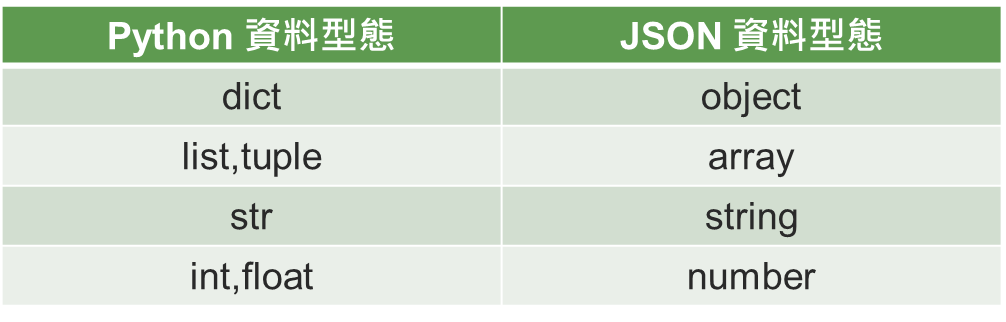
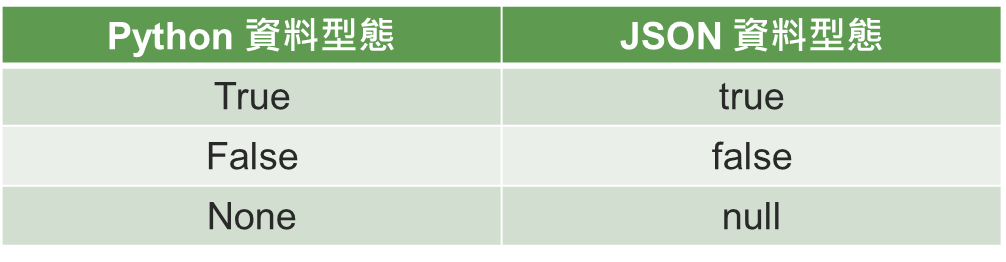

+ 以 json.dumps( ) 函數從 Python 物件轉入 轉出JSON格式字串。
+ 以 json.dump( )函數從 Python 物件轉入 轉出JSON 檔案中。
+ json資料於Python處理UTF8碼內容會產生亂碼，建議 dumps 時加入以下的參數才可以正確處理UTF8碼內容

In [30]:
import json
json1 = {'python':"課程","gjun":100,"python-class":True,"ICQ":None}
josn2 = json.dumps(json1,ensure_ascii=False)
print(josn2)

{"python": "課程", "gjun": 100, "python-class": true, "ICQ": null}


In [31]:
import json
json1 = {'python':"課程","gjun":100,"python-class":True,"ICQ":None}
with open('data0.json','w',encoding='utf-8') as outfile:
    json.dump(json1,outfile,ensure_ascii=False)

In [33]:
import json
data = {}
data['people'] = []
data['people'].append({
    'name': 'Scott',
    'website': 'stackabuse.com',
    'from': 'Nebraska'
})
data['people'].append({
    'name': 'Larry',
    'website': 'google.com',
    'from': 'Michigan'
})

with open('data.json','w',encoding='utf-8') as outfile:
    json.dump(data,outfile,ensure_ascii=False,indent=5)
json2 = json.dumps(data)    
print(json2)
    

{"people": [{"name": "Scott", "website": "stackabuse.com", "from": "Nebraska"}, {"name": "Larry", "website": "google.com", "from": "Michigan"}]}


### Json 轉為 Python物件
+ 以 json.loads( ) 函數從 JSON 字串中取出資料轉入 Python。
+ 以 json.load( ) 函數從 JSON 檔案中取出資料轉入 Python。

In [37]:
import json
json1 = '{"python":"good","gjun":100,"python-class":true,"ICQ":null}'
json2 = json.loads(json1)
print(json2)
print(type(json2))

{'python': 'good', 'gjun': 100, 'python-class': True, 'ICQ': None}
<class 'dict'>


In [38]:
import json
with open("data.json") as jsonfile:
    data = json.load(jsonfile)
    for k in data:
        print(f"{k}={data[k]}")

people=[{'name': 'Scott', 'website': 'stackabuse.com', 'from': 'Nebraska'}, {'name': 'Larry', 'website': 'google.com', 'from': 'Michigan'}]


## 關於檔案關閉動作
+ 檔案開啟後須進行 close( ) 方法進行關閉動作。
+ 若檔案沒關閉會造成：
  + 開啟的文件物件會占用系統資源。
  + Python 可以同時間開啟的文件數量有限制 (約 20 份文件)。
  + 開啟文件物件的模式若為寫入 (w 或 a) 模式，一般都是暫存於緩衝區，系統閒置或文件關閉前才會進行寫入，若沒有進行 close( ) 動作可能造成文件儲存不完整。

In [41]:
import os
class tryopenfile:
    def openfile(self,filePath):
        self.handle = open(filePath,'w')
        
    pass
t = tryopenfile()
filePath = "test.txt"
t.openfile(filePath)
os.remove(filePath)
print("Success!")

PermissionError: [WinError 32] 程序無法存取檔案，因為檔案正由另一個程序使用。: 'test.txt'

## With 方式操作檔案
+ 多個檔案存取時若前一個檔案產生 IO 例外，將會造成後面無法進行close( ) 動作。
+ 以 with 方式操作檔案：
  + 檔案存取仍有可能產生 IO 例外。
  + 離開 with 區塊時檔案將會自動進行 close( ) 動作，自動關閉檔案。

In [45]:
import os
class tryopenfile:
    def openfile(self,filePath):
        with open(filePath,'w') as f:
             f.write("ABCD")
    pass
t = tryopenfile()
filePath = "test2.txt"
t.openfile(filePath)
os.remove(filePath)
print("Success!")

Success!


### 自訂物件轉JSON 

In [50]:
import json
class Student:
    def __init__(self,name,age):
        self.name = name
        self.age = age
    def __str__(self):
        return f"{self.name}:{self.age}"
st = Student("Ken",25)
##print(st)
print(st.__dict__)
jsonStr = json.dumps(st.__dict__,ensure_ascii=False)
print(jsonStr)

{'name': 'Ken', 'age': 25}
{"name": "Ken", "age": 25}


## 作業

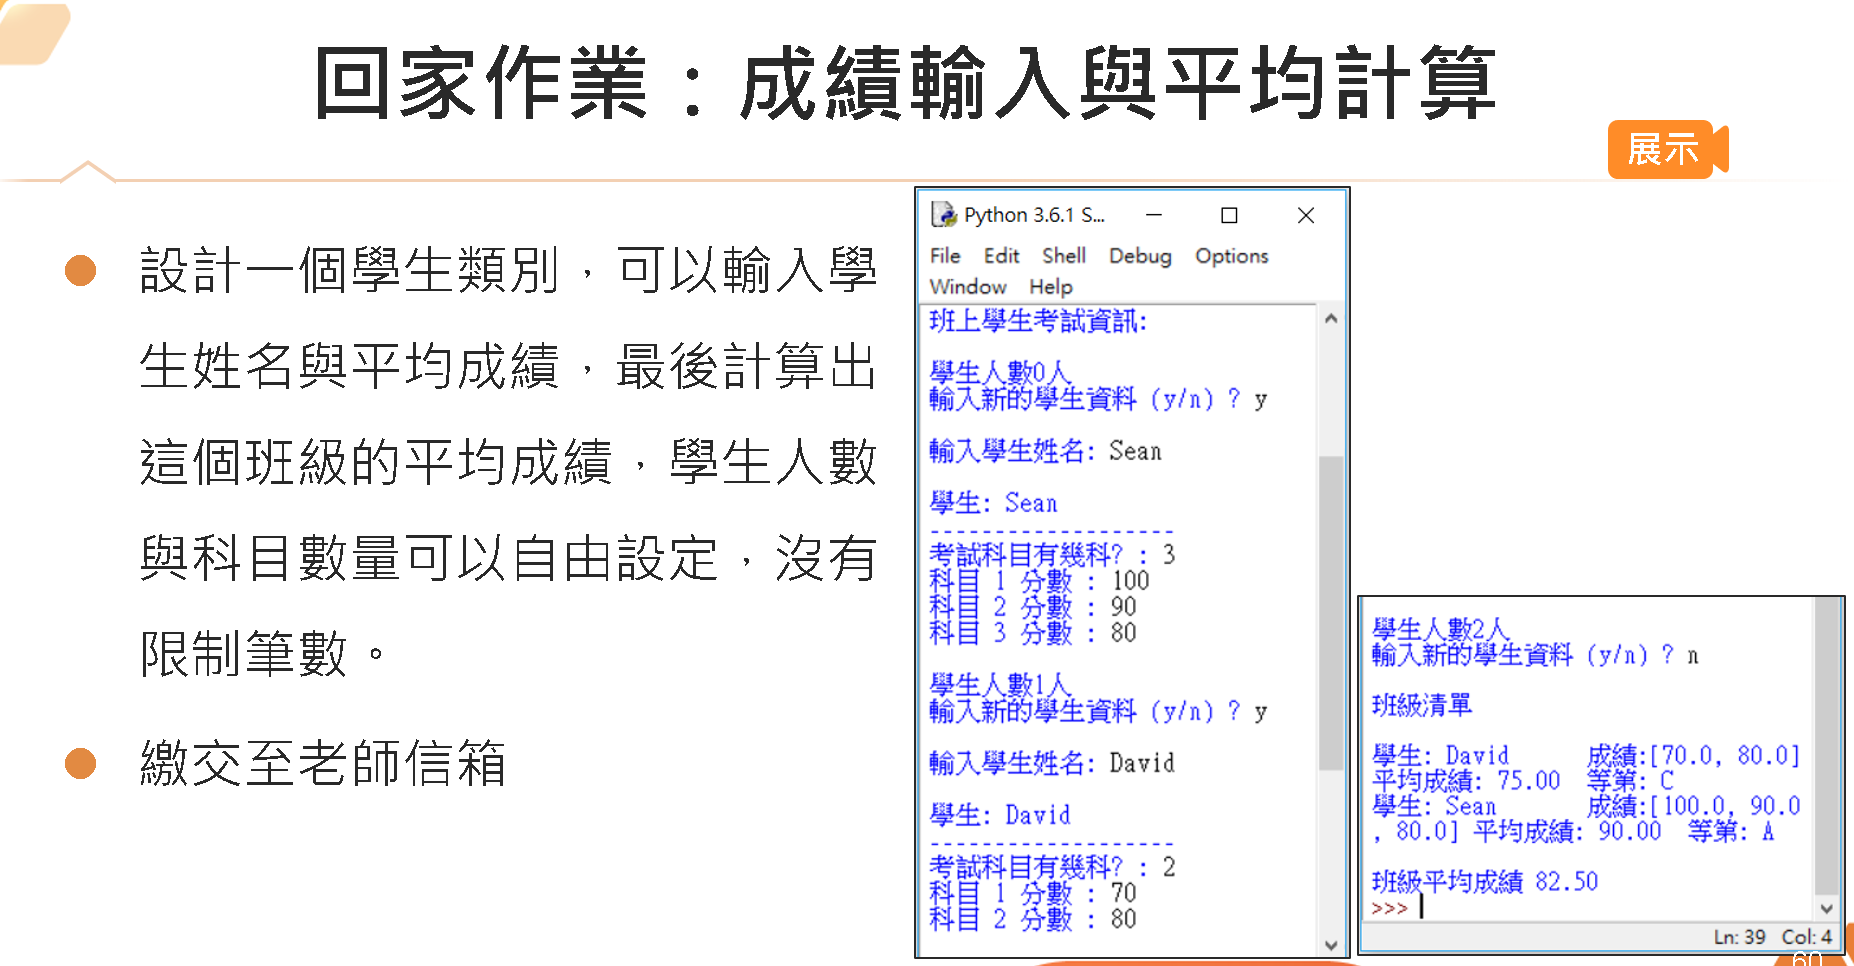